# Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Customers EDA

In [4]:
df = pd.read_csv('Customers.csv', parse_dates=['SignupDate'])
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Summary Statistics:
                SignupDate
count           

## Making A Line plot number of monthly of signups and months

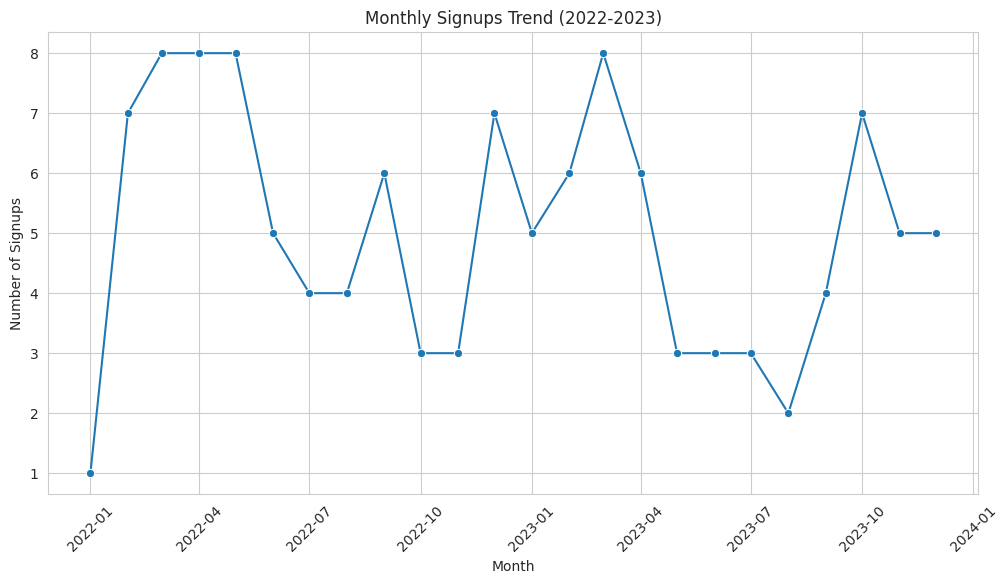

In [5]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
regional_dist = df['Region'].value_counts().reset_index()
regional_dist.columns = ['Region', 'Count']
historical_df = df[df['SignupDate'].dt.year.isin([2022, 2023])].copy()
historical_df['MonthYear'] = historical_df['SignupDate'].dt.to_period('M')
monthly_signups = historical_df.groupby('MonthYear').size().reset_index(name='Count')
monthly_signups['MonthYear'] = monthly_signups['MonthYear'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(x='MonthYear', y='Count', data=monthly_signups, marker='o')
plt.title('Monthly Signups Trend (2022-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Making a Piechart yearly signups


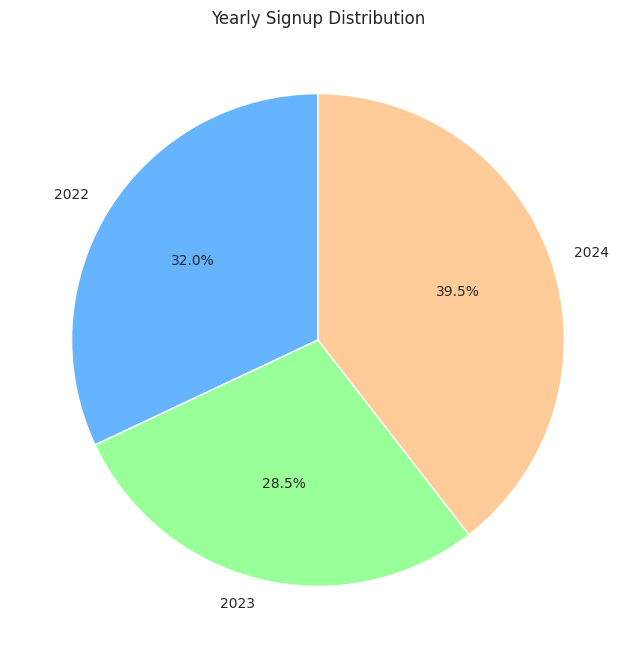

In [6]:
yearly_dist = df['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(yearly_dist, labels=yearly_dist.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Yearly Signup Distribution')
plt.show()

## Regional performance and worst performaing region  



Regional Performance:
Region
South America    59
Europe           50
North America    46
Asia             45
dtype: int64


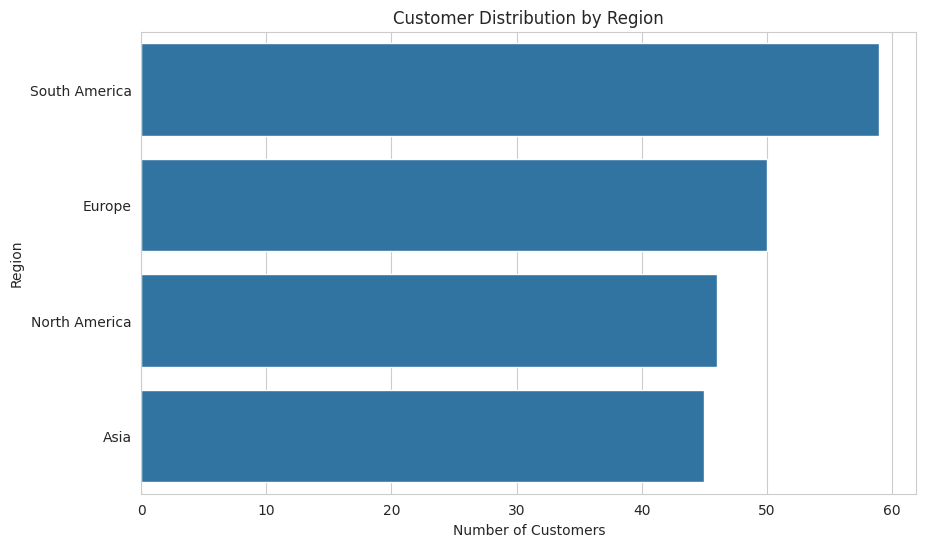


Recommendation: Focus on North America with 46 customers
Suggested actions: Targeted marketing campaigns, customer satisfaction analysis


In [10]:
region_growth = df.groupby('Region').size().sort_values(ascending=False)
print("\nRegional Performance:")
print(region_growth)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Region', data=regional_dist)
plt.title('Customer Distribution by Region')
plt.xlabel('Number of Customers')
plt.ylabel('Region')
plt.show()
underperforming = 'North America'
underperforming_data = df[df['Region'] == underperforming]
print(f"\nRecommendation: Focus on {underperforming} with {len(underperforming_data)} customers")
print("Suggested actions: Targeted marketing campaigns, customer satisfaction analysis")

# Transactions Data analysis


## Data loading, grouping and basic information


In [ ]:
df = pd.read_csv('Transactions.csv')
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.month
monthly_sales = df.groupby('Month')['TotalValue'].sum()


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null 

## Monthly sales

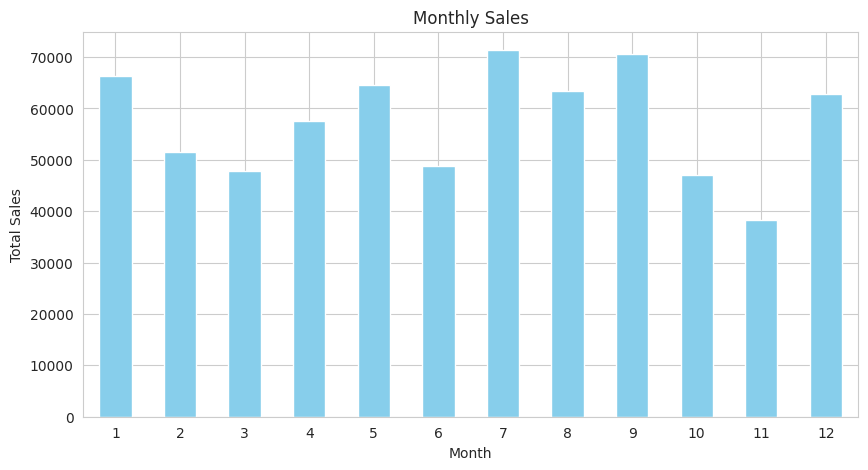

In [ ]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

## Top 10 Products by Quantity Sold

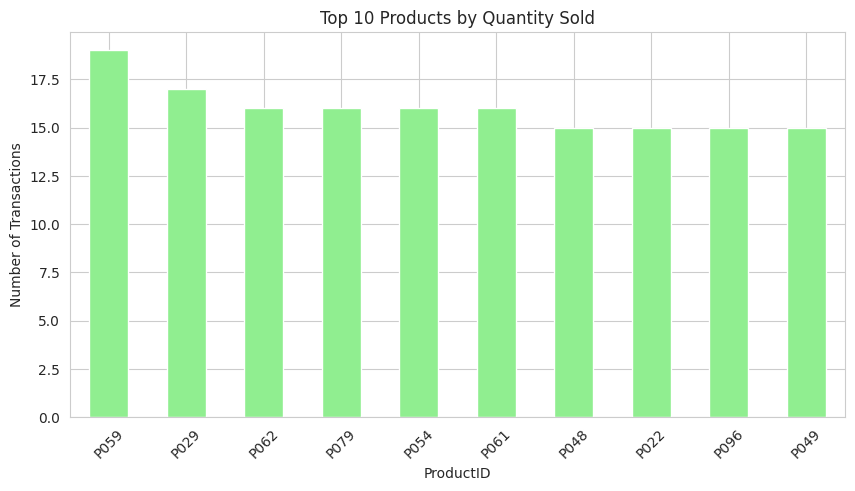

In [ ]:
top_products = df['ProductID'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('ProductID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

## Top 10 Customers by Total Spending

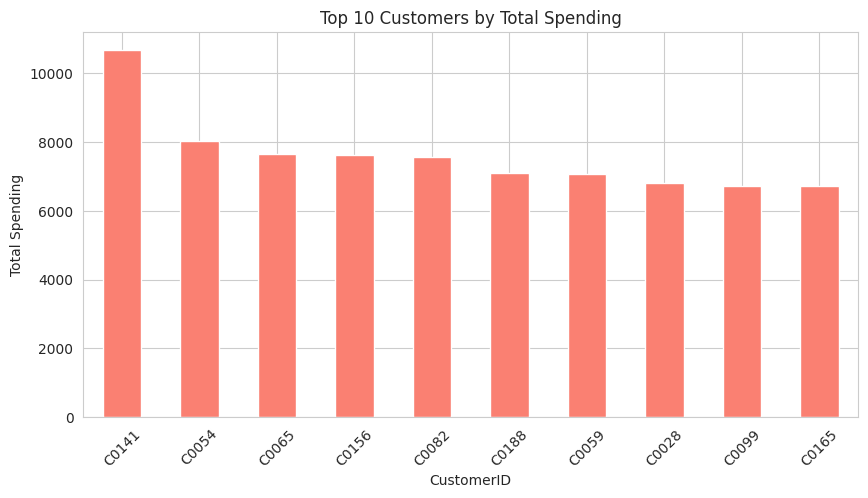

In [ ]:
top_customers = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

## Checking rows for some inconsistancy




In [ ]:
df['CalculatedTotal'] = df['Quantity'] * df['Price']
mismatch = df[df['TotalValue'] != df['CalculatedTotal']]
print(f"\nMismatched rows: {len(mismatch)}")


Mismatched rows: 88


## Correlation heatmap


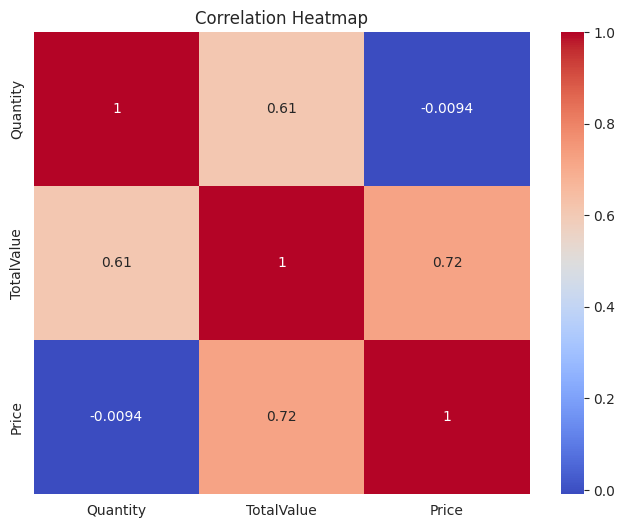

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Products Data analysis

In [12]:
df = pd.read_csv("Products.csv")
print(df.head())
print(df.info())
print(df.describe())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


## Products by Category

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


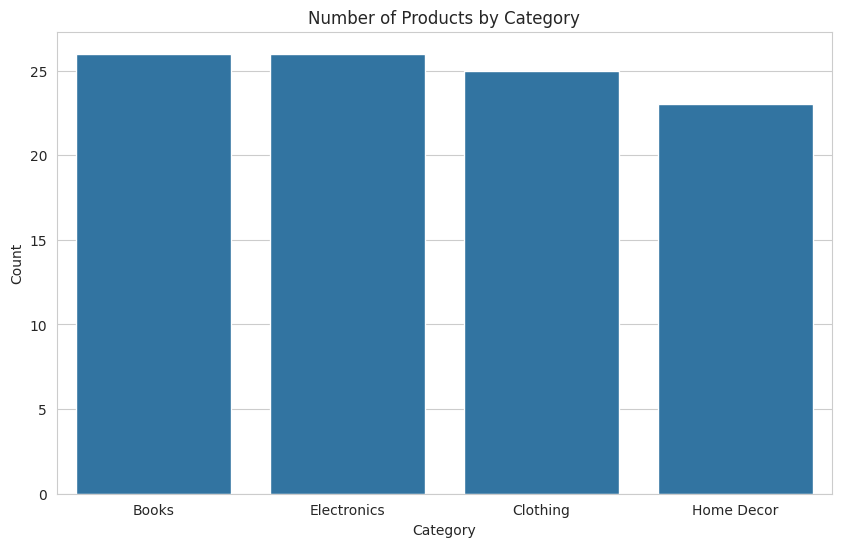

In [13]:
category_counts = df['Category'].value_counts()
print(category_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Price Distribution By price


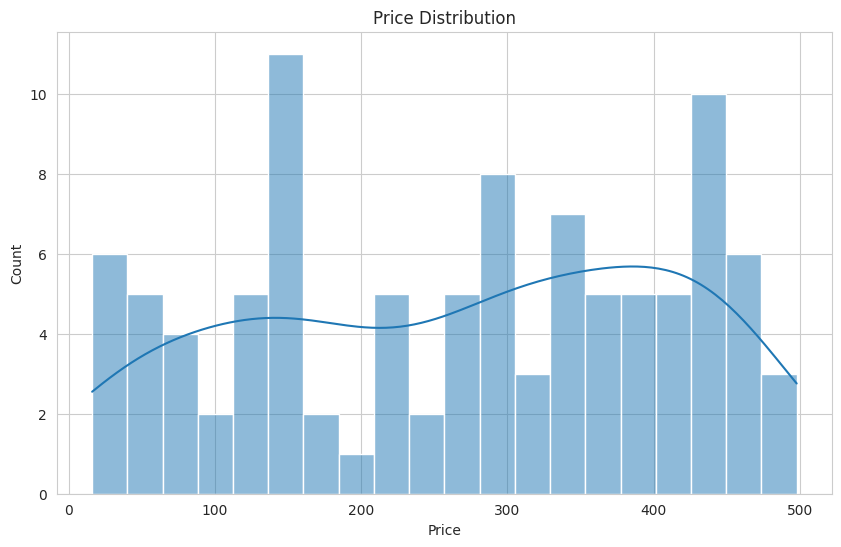

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

## Price Distribution by Category

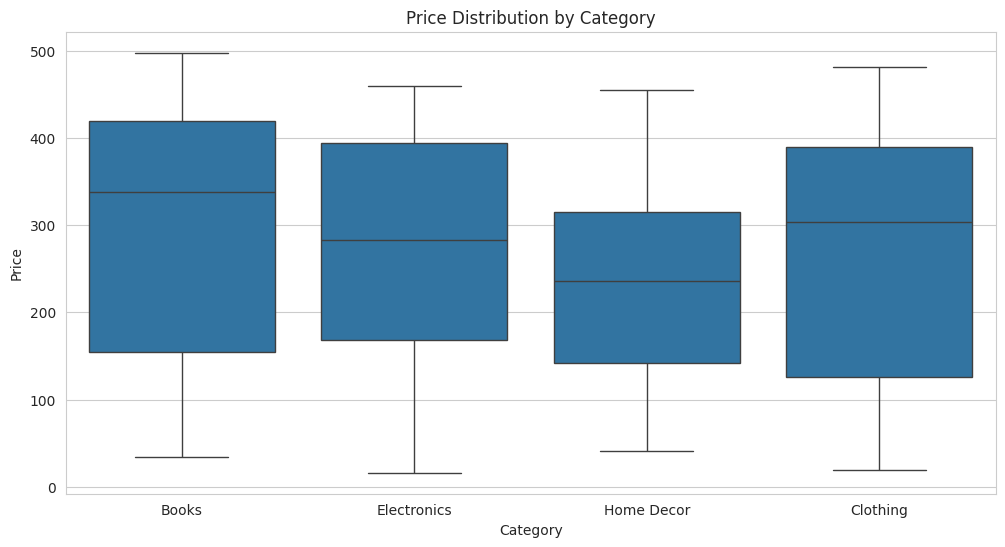

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Price Distribution by Category')
plt.show()

In [16]:

df['Brand'] = df['ProductName'].apply(lambda x: x.split()[0])
brand_counts = df['Brand'].value_counts()
print(brand_counts)
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
print(brand_price)



Brand
ActiveWear       23
SoundWave        22
HomeSense        15
BookWorld        14
TechPro          14
ComfortLiving    12
Name: count, dtype: int64
Brand
ActiveWear       293.426522
SoundWave        289.775000
TechPro          288.953571
BookWorld        279.864286
ComfortLiving    217.153333
HomeSense        204.134667
Name: Price, dtype: float64


## Check for duplicate product names

In [17]:
duplicates = df[df.duplicated(subset=['ProductName'], keep=False)]
print(duplicates.sort_values('ProductName'))


   ProductID               ProductName     Category   Price          Brand
24      P025   ActiveWear Cookware Set   Home Decor  284.62     ActiveWear
22      P023   ActiveWear Cookware Set   Home Decor  454.53     ActiveWear
41      P042     ActiveWear Headphones  Electronics  379.44     ActiveWear
71      P072     ActiveWear Headphones  Electronics  399.34     ActiveWear
13      P014         ActiveWear Jacket     Clothing   26.26     ActiveWear
19      P020         ActiveWear Jacket     Clothing  396.34     ActiveWear
79      P080         ActiveWear Jacket     Clothing  303.50     ActiveWear
5       P006            ActiveWear Rug   Home Decor  121.32     ActiveWear
78      P079            ActiveWear Rug   Home Decor  417.37     ActiveWear
15      P016  ActiveWear Running Shoes     Clothing  330.05     ActiveWear
43      P044  ActiveWear Running Shoes     Clothing   18.82     ActiveWear
76      P077     ActiveWear Smartwatch  Electronics  265.51     ActiveWear
82      P083     ActiveWe

## Cross-tabulation of Brands and Category

In [18]:
cross_tab = pd.crosstab(df['Brand'], df['Category'])
print(cross_tab)

Category       Books  Clothing  Electronics  Home Decor
Brand                                                  
ActiveWear         4         7            7           5
BookWorld          5         4            2           3
ComfortLiving      3         1            5           3
HomeSense          1         6            2           6
SoundWave          8         3            8           3
TechPro            5         4            2           3
